In [18]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Name: 

# Instructions

* For math problems, you are _**encouraged**_ to use $\LaTeX,$ however handwritten solutions are also accepted provided that they are __extremely__ tidy and thorough. 
* Please make sure you explain the rationale behind each step -- this is very important because:
   1.  It shows me that you understood each step and that you are not (just) copying from a friend or a solution found online. 
   2.  It helps me understand your approach, I often see you using new approaches that are correct and also different that what I or the author came up with. 
* <font color="red"> **ALSO:**, please **staple** your solutions before submitting them. </font> I will start deducting points for unstapled submissions if this continues to be a problem. Be a good friend and offer to share a stapler with a freind if they need it -- I cannot keep track of a stack of loose paper!

* Pleas make sure <font color=red> all of your code fits on the printed pages</font>, this may require breaking long lines into several shorter ones. I must see your code in order to beleive it is correct. 

# Problems

## Problem 1
4.14 (*) Show that for a linearly separable data set, the maximum likelihood solution
for the logistic regression model is obtained by finding a vector $\mathbf{w}$ whose decision
boundary $\mathbf{w}^T \phi(\mathbf{x}) = 0$ separates the classes and then taking the magnitude of $\mathbf{w}$ to
infinity.  
> **NOTE:** is this a good or a bad thing about the maximum likelihood solution...?

## Problem 2
4.18 (*) Using the result (4.91) for the derivatives of the softmax activation function,
show that the gradients of the cross-entropy error (4.108) are given by (4.109).

# Problem 3
Demonstrate the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) class from sklearn on a *two dimensonal* slice of either:
1. The fisher iris data
2. Data from one of the kaggle competitions

You must:
1. Separate your data into five different _test_ and _training_ sets, using [Stratified Kfold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) cross validation, making sure that you set the parameter to shuffle your data. 
1. For each of the 5 different folds/classifiers:
    1. Show the the way the space is partitioned, e.g. Fig 2.28 or Fig 4.5. 
        1. Include a scatter plot of the training data, using colors to indicate the different target labels. 
        1. Include a scatter plot of the test data using a different marker (e.g. squares), also using different colors to indicate expected labels. 
    1. Use the [Classification Report](http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) and the [Confusion Matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) to present the quality of your classifiers.

You must share code as well as figures. 
Comment on how well you think your classifier will work on a secret test set (e.g. Kaggle's test set)

> **HINT:** I do not expect this to take a large amount of code; most of what I ask is available already in scipy / sklearn

I did this in about 30 minutes and 35 lines of code (other than what I have shared with you).  Here is the output _I_ produced for the first fold. I made use of the `plot_confusion_matrix` function that I have included in this notebook for you to use as well. 

### Fold # 1 (of 5)

<img src="my-soln-plot-fold1.png">
```
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.70      0.82        10
  virginica       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30
```
<img src="my-soln-cm-fold1.png">


In [66]:
from sklearn.datasets import load_iris  # or use some other data, that is ok
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Found a local copy of the data (yay!)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<IPython.core.display.Javascript object>


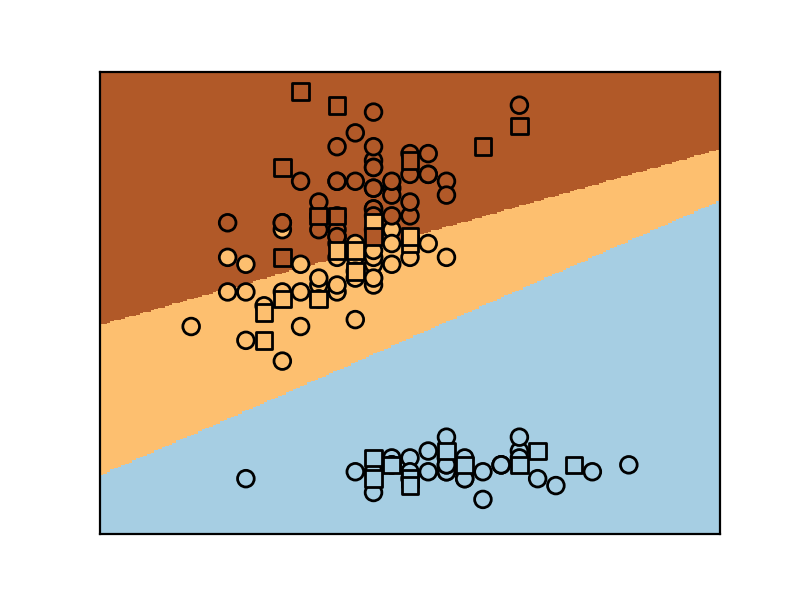

<IPython.core.display.Javascript object>


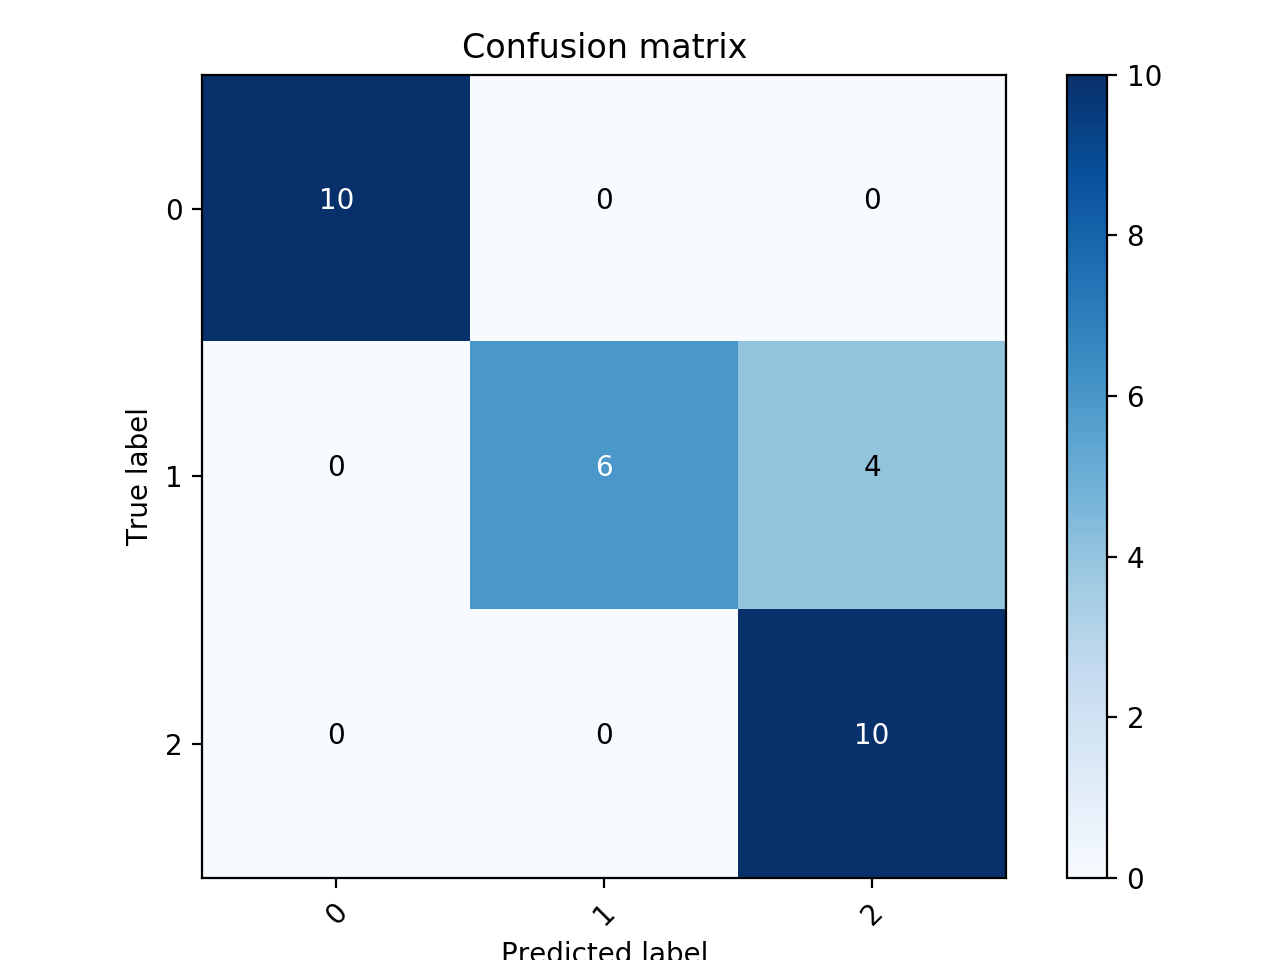

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.60      0.75        10
          2       0.71      1.00      0.83        10

avg / total       0.90      0.87      0.86        30



<IPython.core.display.Javascript object>


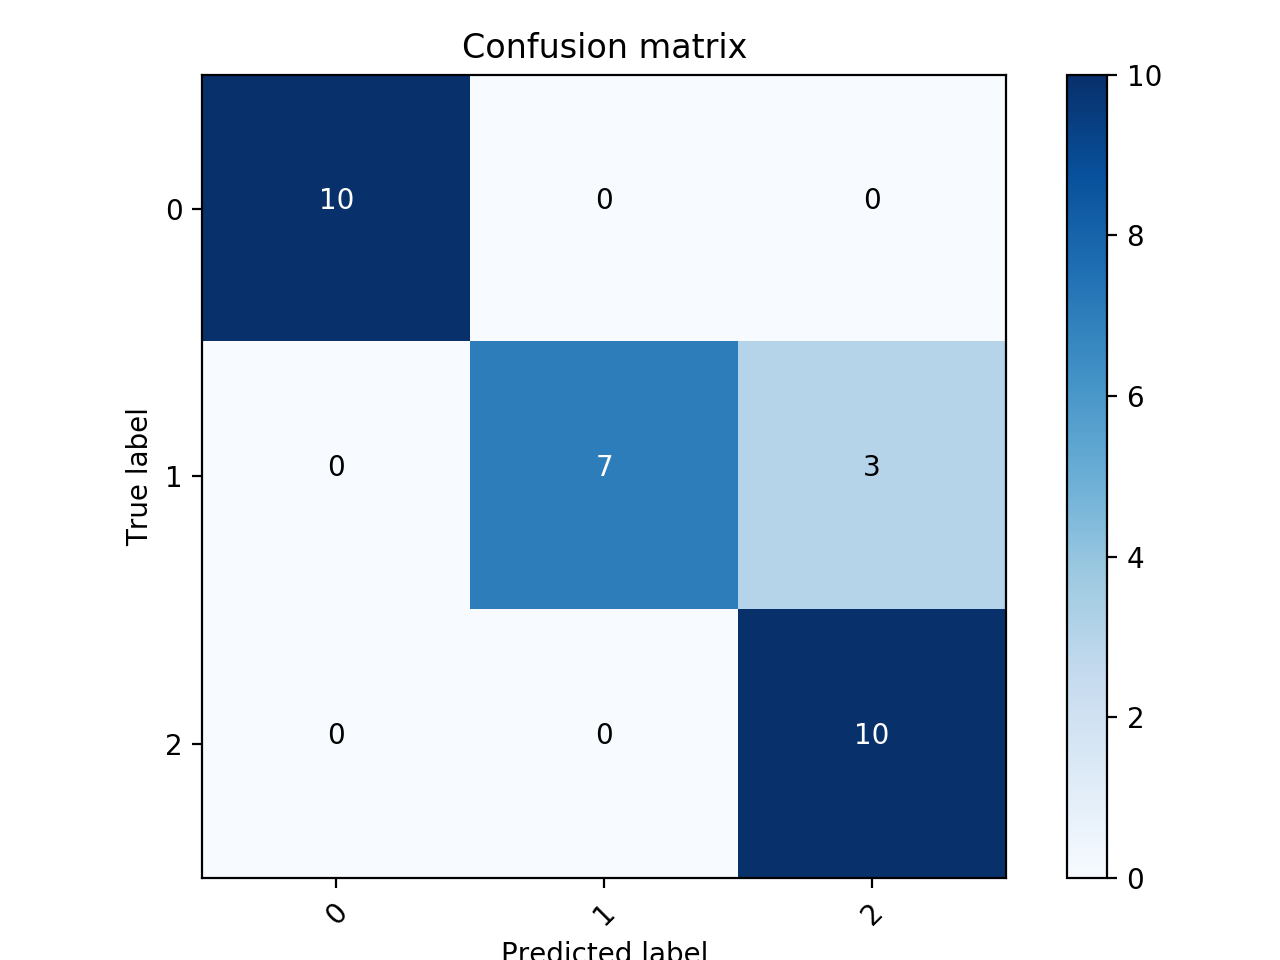

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.70      0.82        10
          2       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30



<IPython.core.display.Javascript object>


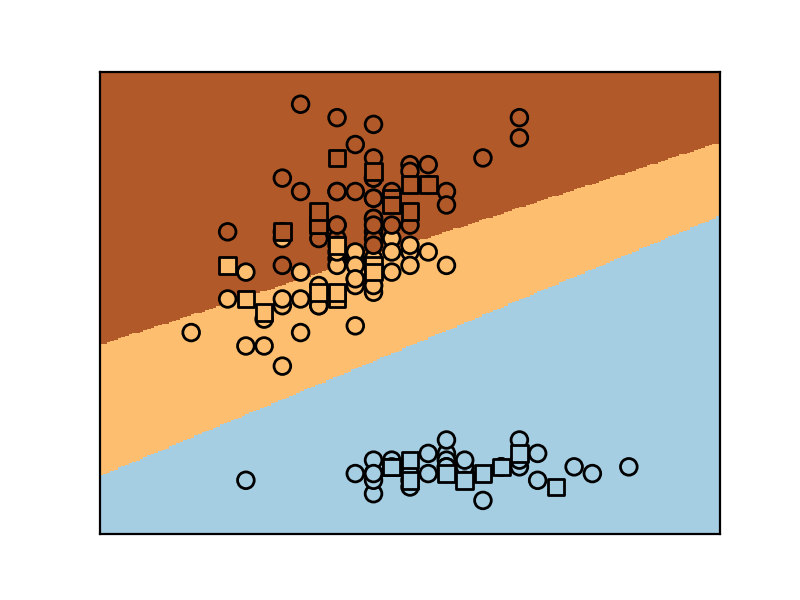

<IPython.core.display.Javascript object>


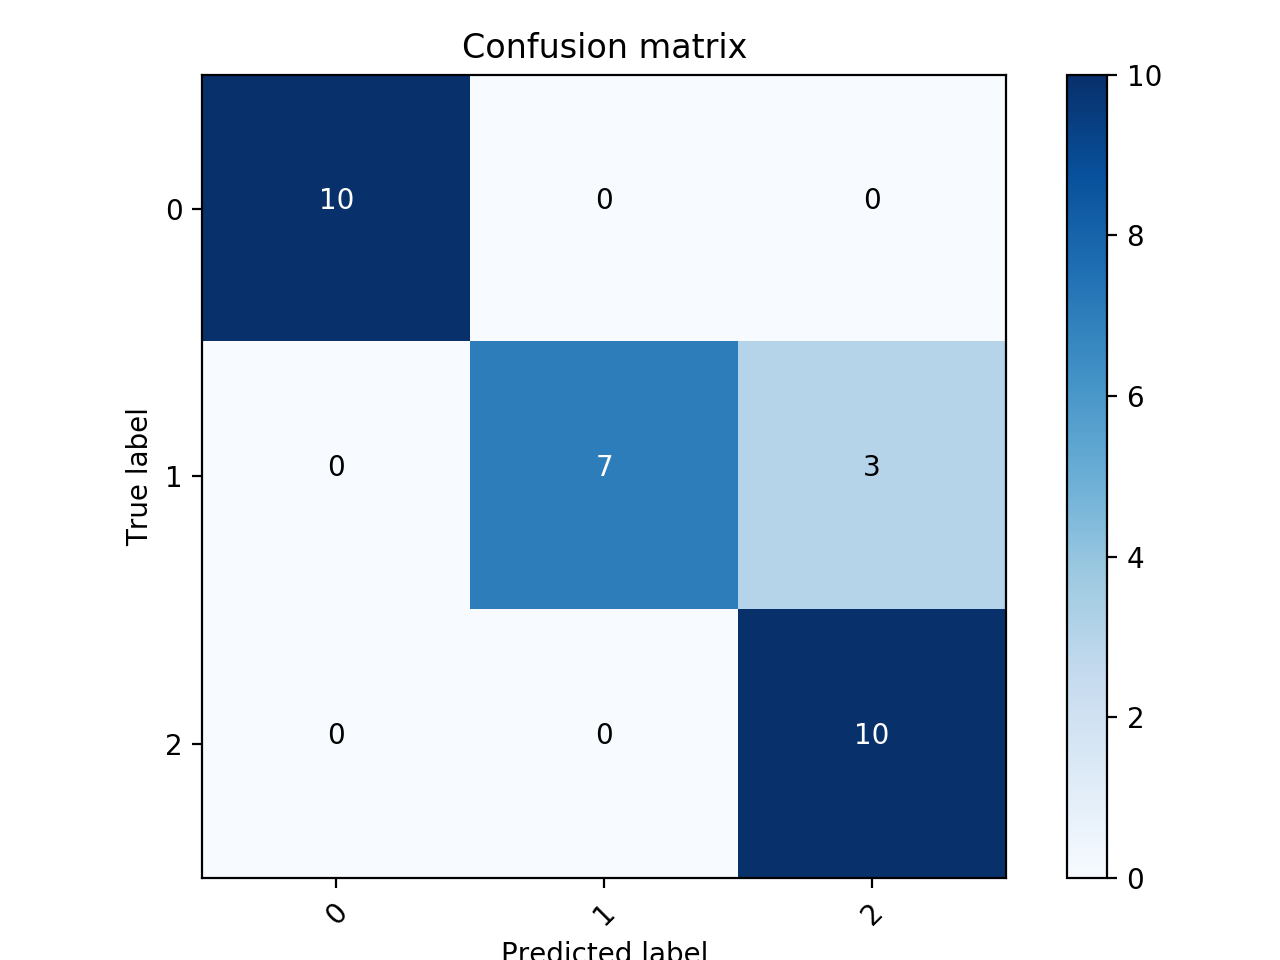

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.70      0.82        10
          2       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30



<IPython.core.display.Javascript object>


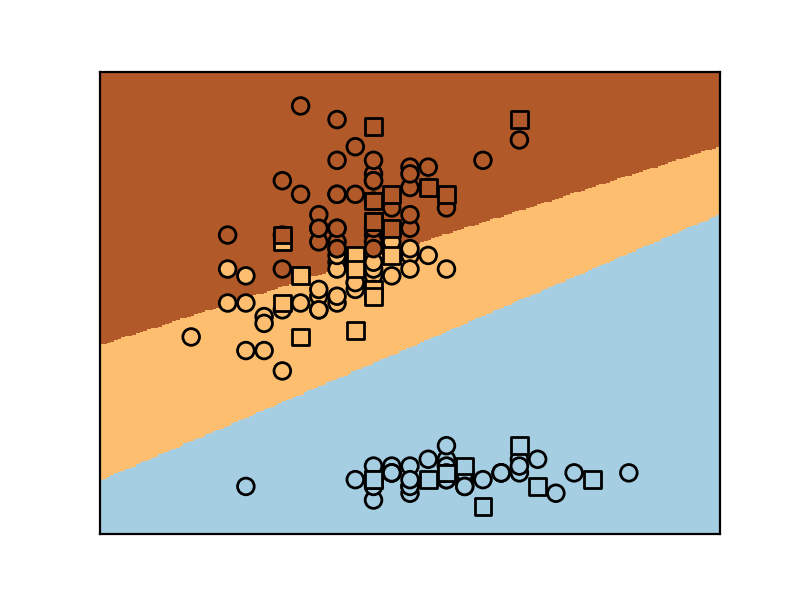

<IPython.core.display.Javascript object>


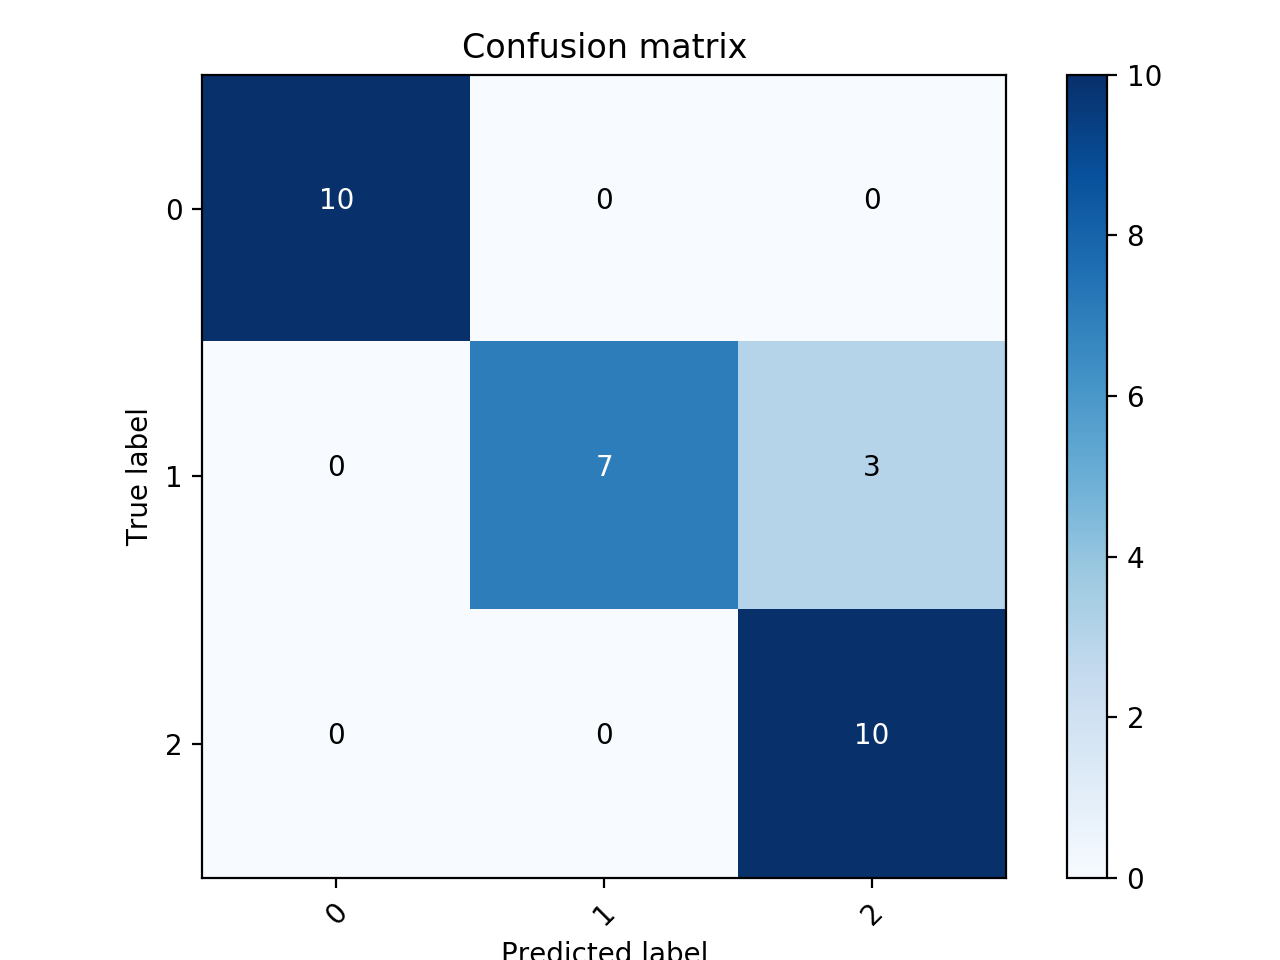

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.70      0.82        10
          2       0.77      1.00      0.87        10

avg / total       0.92      0.90      0.90        30



<IPython.core.display.Javascript object>


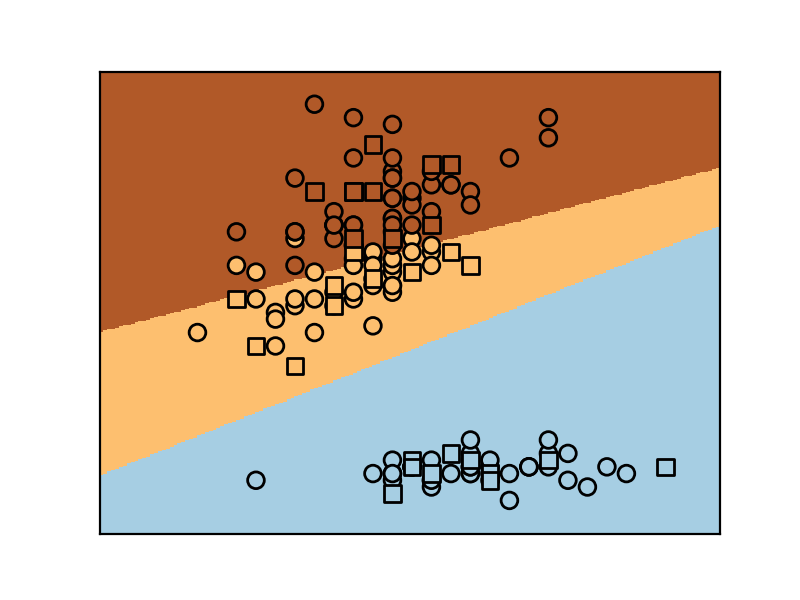

<IPython.core.display.Javascript object>


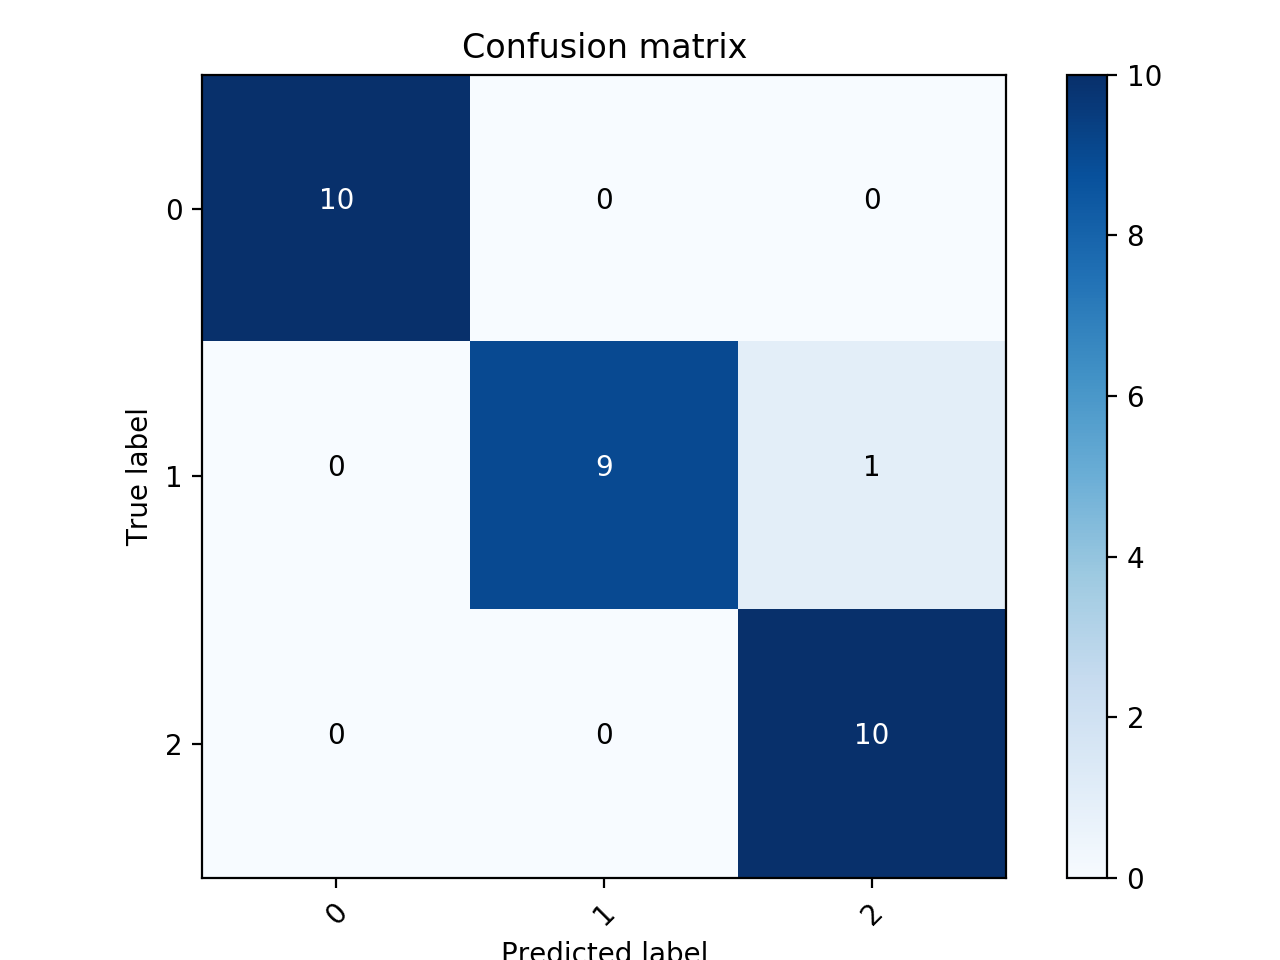

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.90      0.95        10
          2       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97        30



In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, 1:3]
y = iris.target
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=None)
# put the data into lists as defined by the training and test lists
testData, trainData, testTarget, trainTarget, folds = [], [], [], [], []
count = 0
i = 6
for train, test in skf.split(X, y):
    
    trainData = X[train]
    trainTarget = y[train]
    testData = X[test]
    testTarget = y[test]
    
    h = .02  # step size in the mesh

    logreg = LogisticRegression()
    
    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(trainData, trainTarget)
    
    x_min, x_max = trainData[:, 0].min() - .5, trainData[:, 0].max() + .5
    y_min, y_max = trainData[:, 1].min() - .5, trainData[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(count, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(trainData[:, 0], trainData[:, 1], c=trainTarget, edgecolors='k', cmap=plt.cm.Paired)
    plt.scatter(testData[:, 0], testData[:, 1], c=testTarget, edgecolors='k', cmap=plt.cm.Paired, marker = 's')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    count += 1
    
    plt.figure(i)
    i+=1
    predictTargets = logreg.predict(testData)
    cm = confusion_matrix(testTarget, predictTargets)
    plot_confusion_matrix(cm, [0,1,2])
    print(classification_report(testTarget, predictTargets))
    


    

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

title = 'LinearSVC (linear kernel)'

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

TypeError: 'str' object is not callable

In [75]:
from sklearn import svm, datasets
setosa = targets=='Iris-setosa' #binary vectors that represent if the data point is the given target
versicolor = targets=='Iris-versicolor'
virginica = targets=='Iris-virginica'
model = svm.LinearSVC(C=1.0).fit(X, y)

scatter(data[setosa,0], data[setosa,1], color='red', label='setosa'); # pulls out only data of setosa type
scatter(data[versicolor,0], data[versicolor,1], color='green', label='versicolor');
scatter(data[virginica,0], data[virginica,1], color='blue', label='virginica');

xlabel(df.columns[0])
ylabel(df.columns[1])
legend(loc='upper right')

title('A 2D slice of 4D Iris data');

TypeError: 'str' object is not callable

[[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2.8]

<IPython.core.display.Javascript object>


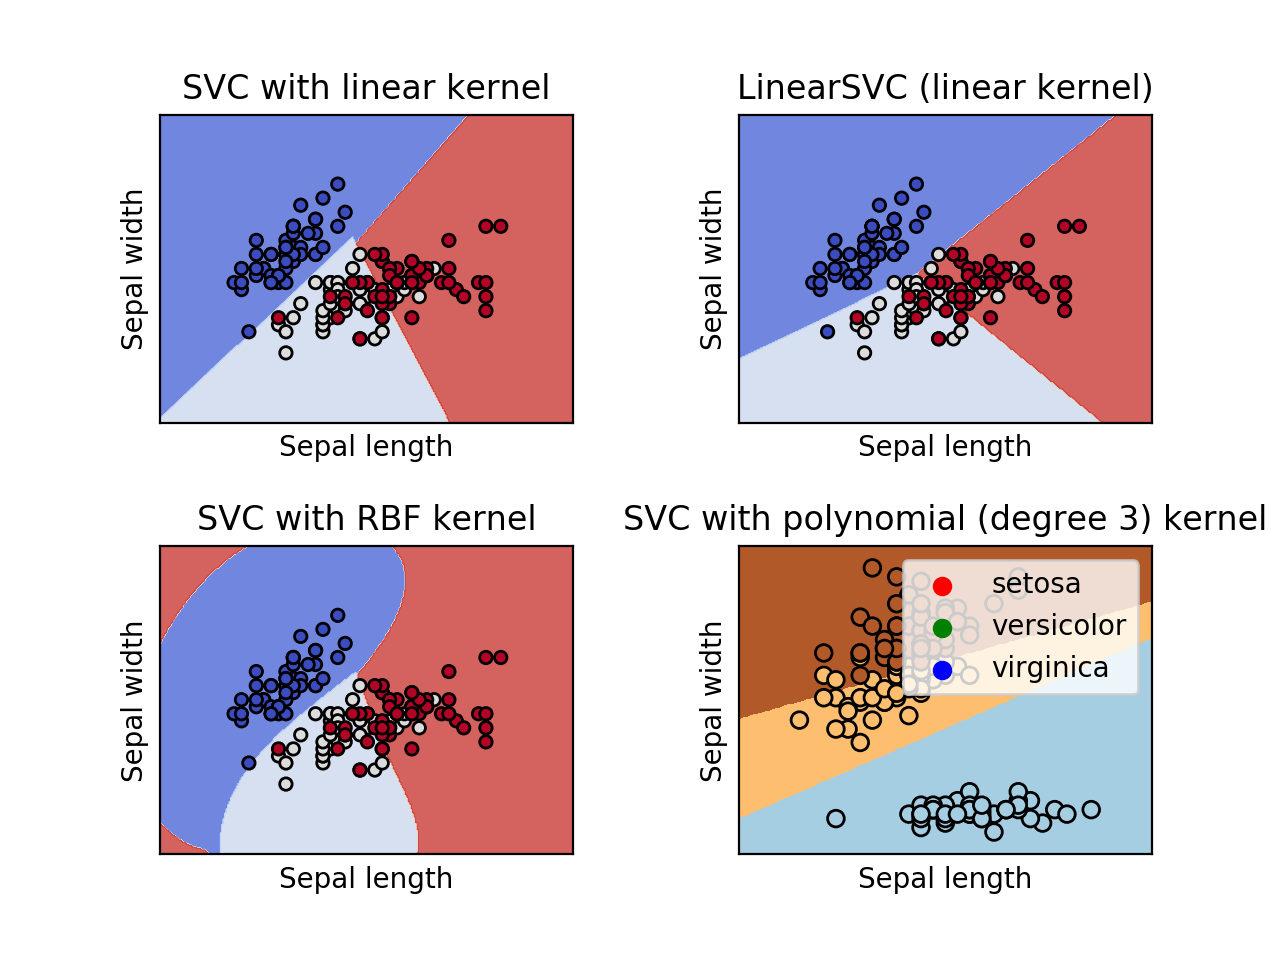

In [74]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
